In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt


array([0.27376235])

In [7]:
# RitvikMath problem
rs = []
p =0.5
i=0
while i <10000:
    r = 0
    nloss =0

    while nloss!=2:
        r = r+1
        if np.random.uniform(0,1,1)[0] < p:
            nloss = 0
        else:
            nloss = nloss + 1
    rs.append(r)
    i= i+1

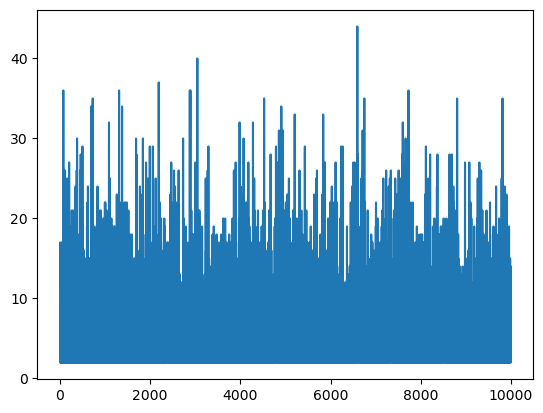

In [11]:
plt.plot(range(0,10000), rs)

# Power plant emissions

In [2]:
Installed_Capacity = 1800 #MW
n_samples = 1000

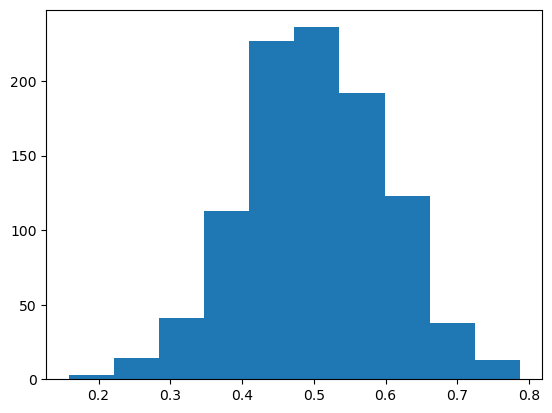

In [3]:
# Parameters for the base normal distribution (bulk of data)
mean = 0.5
std = 0.1

# Generate the base distribution
PLF = np.random.normal(mean, std, int(n_samples))
plt.hist(PLF)
plt.show()

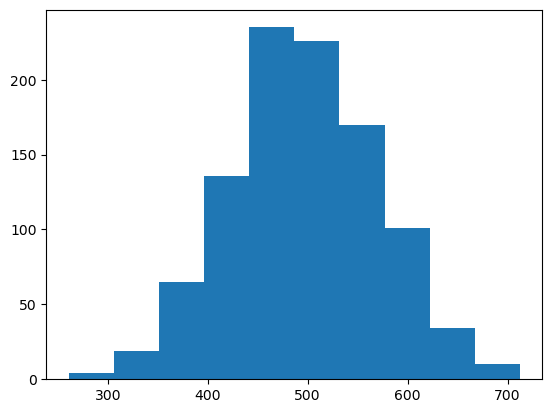

In [4]:
mean = 500
std = 75

# Generate the base distribution
Coal_demand = np.random.normal(mean, std, int(n_samples))
plt.hist(Coal_demand)
plt.show()

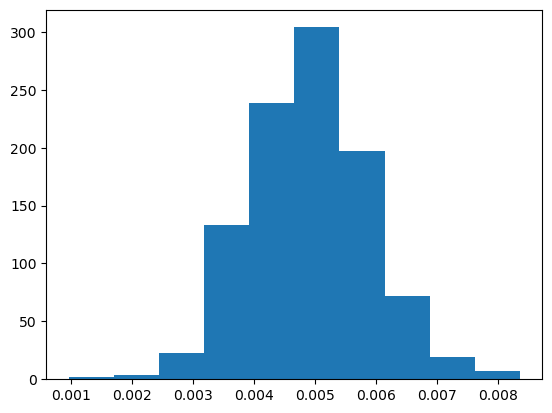

In [5]:
mean = 0.005
std = 0.001

# Generate the base distribution
Sulphur = np.random.normal(mean, std, int(n_samples))
plt.hist(Sulphur)
plt.show()

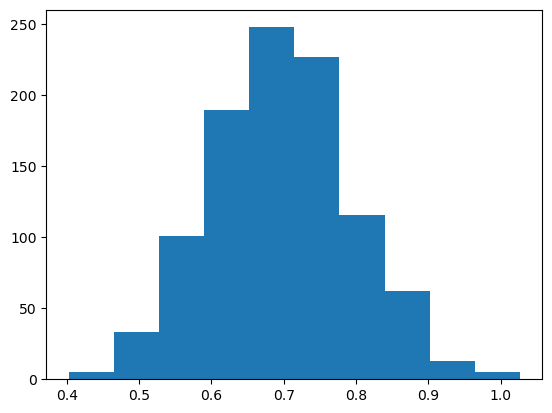

In [8]:
# Parameters for the base normal distribution (bulk of data)
mean = 0.7
std = 0.1

# Generate the base distribution
FGD_eff = np.random.normal(mean, std, int(n_samples))
#FGD_eff[FGD_eff < 0] = 0
#FGD_eff[FGD_eff > 1] = 1

plt.hist(FGD_eff)
plt.show()

In [9]:
generation = (Installed_Capacity/1000) * 365 * 24
coal_consumption = (Coal_demand/1000) * generation * 1000000 * PLF
so2_emissions = coal_consumption * Sulphur * (1 - FGD_eff)

Percentage of outliers: 1.7999999999999998 %


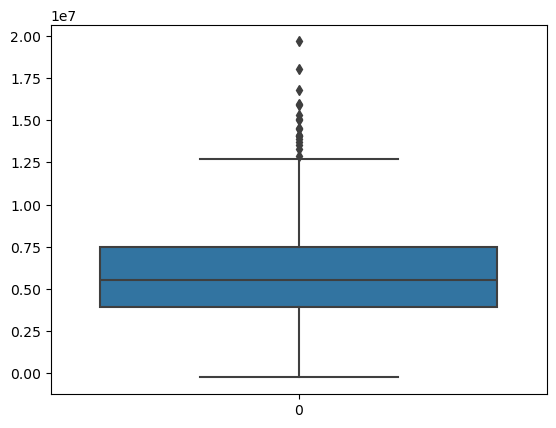

In [10]:
import seaborn as sns
sns.boxplot(so2_emissions)

# Step 1: Calculate Q1 and Q3
Q1 = np.percentile(so2_emissions, 25)
Q3 = np.percentile(so2_emissions, 75)

# Step 2: Calculate the IQR
IQR = Q3 - Q1

# Step 3: Calculate the upper whisker
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Step 4: Count values greater than the upper whisker
outliers = so2_emissions[so2_emissions > upper_whisker]
outlier_count = len(outliers) + len(so2_emissions[so2_emissions < lower_whisker])

# Step 5: Calculate the percentage of values that are outliers
total_count = len(so2_emissions)
percentage_outliers = (outlier_count / total_count) * 100

print('Percentage of outliers: {} %'.format(percentage_outliers))


#plt.hist(so2_emissions, density=True)
plt.show()

In [15]:
mu

5876117.290775791

In [47]:
from scipy.stats import kstest


#perform Kolmogorov-Smirnov test for normality
kstest(so2_emissions, 'norm')

KstestResult(statistic=0.94, pvalue=0.0, statistic_location=52375.20676399997, statistic_sign=-1)

In [44]:
# Parameters for the base normal distribution (bulk of data)
mean = 4
std = 1
n_samples = 10000

# Generate the base distribution
base_data = np.random.normal(mean, std, int(n_samples * 0.85))

# Generate the upper tail (outliers) by adding values from a higher mean
upper_tail = np.random.normal(mean + 3 * std, 2 * std, int(n_samples * 0.15))

# Combine the base data with the upper tail to form the final dataset
data = np.concatenate([base_data, upper_tail])


In [45]:
xs = []

# loop n_simulations times
for _ in range(n_simulations):
    
    # x is randomly drawn from a continuous uniform distritbuion
    #x = np.random.uniform(1, 2)
    x = np.random.choice(base_data)
    # store x in the list
    xs.append(x)

In [46]:
ys = []

# loop n_simulations times
for _ in range(n_simulations):
    
    # x is randomly drawn from a continuous uniform distritbuion
    #x = np.random.uniform(1, 2)
    y = np.random.choice(data)
    # store x in the list
    ys.append(y)

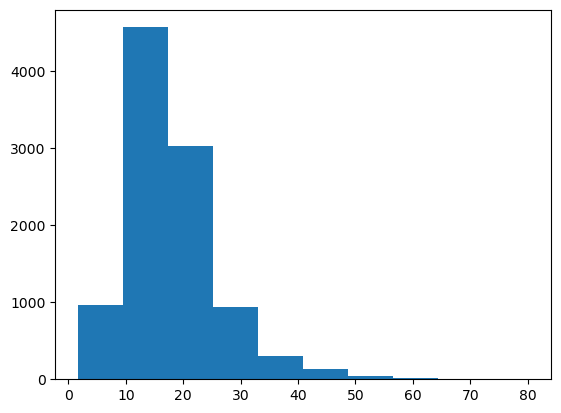

In [47]:
plt.hist(np.array(xs) * np.array(ys))
plt.show()

In [13]:
# create lists to store x and y values
l_xs = []

# Set parameters for the Gamma distribution
shape = 2.0  # Shape parameter (alters skewness)
scale = 2.0  # Scale parameter (alters spread)

# We will adjust this threshold dynamically by trial and error to achieve about 15%
percentile_85 = np.percentile(np.random.gamma(shape, scale, 100000), 85)

# loop n_simulations times
for _ in range(n_simulations):
    
    # x is randomly drawn from a continuous uniform distritbuion
    #x = np.random.uniform(1, 2)
    x = np.random.normal(loc=1, scale=1, size=1)[0]

    x = np.random.gamma(shape, scale, 1)[0]
    # store x in the list
    l_xs.append(x)

    # Proportion of high values (above the 85th percentile)
    high_value_count = np.sum(samples > percentile_85)
    high_value_proportions.append(high_value_count / n_samples)

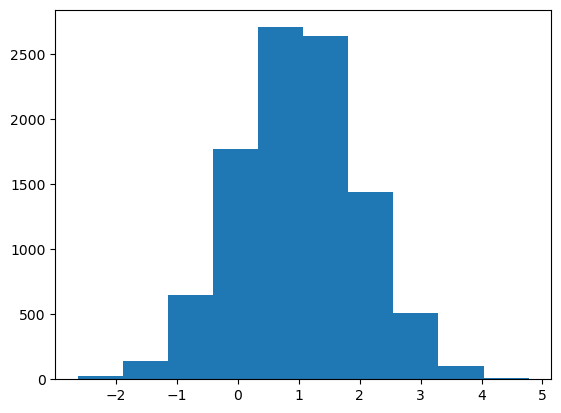

In [15]:
plt.hist(l_xs)
plt.show()

In [12]:
x[0]

2.552231117276566

In [60]:
#x = np.random.uniform(1, 2)
xs = []
for _ in range(10):
    #x = np.random.normal(loc=56, scale=2, size=1)[0]
    x = np.random.uniform(50, 60)
    xs.append(x)

In [61]:
np.array(xs).mean()

54.55518918822149